## Descripció

Comencem a familiaritzar-nos amb Pipelines, grid search i text mining !!! Comencem amb uns quants exercicis bàsics


## Nivell 1

**- Exercici 1:**
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
from imblearn.over_sampling import SMOTE
#Exercici 2
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
#Exercici 3
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
#Exercici 4
from nltk.sentiment import SentimentIntensityAnalyzer



%matplotlib inline   

Faig servir una base de dades que es fa servir de prova per entrar en una la **1a Hackathon de LaCaixa**:

Los insectos nocturnos representan uno de los grupos más diversos de organismos, por lo que es de suma importancia estudiarlos.

Es por ello que un grupo de prestigiosos entomólogos han construido un ecosistema aislado con múltiples especies para poder estudiarlos en mayor detalle. Para este estudio están diseñando un sistema de sensores para poder trackear de forma automática las dinámicas y hábitos de estos insectos.

Este dataset contiene datos de las mediciones de los sensores, el tiempo de las mediciones y el tipo de insecto identificado.


El dataset de clientes 'train.csv' contiene las siguientes variables:

Hour: Hora a la que se ha hecho la medición.

Minutes: Minutos en los que se ha realizado la medición.

Sensor_alpha: Posición del insecto al sensor alpha.

Sensor_beta: Posición del insecto al sensor beta.

Sensor_gamma: Posición del insecto al sensor gamma.

Sensor_alpha_plus: Posición del insecto al sensor alpha+.

Sensor_beta_plus: Posición del insecto al sensor beta+.

Sensor_gamma_plus: Posición del insecto al sensor gamma+.

Insect: Categoría de insecto.

    0 -> Lepidoptero 

    1 -> Himenoptera

    2 -> Diptera


In [2]:
insect_df=pd.read_csv ('train.csv',index_col=0)

In [3]:
insect_df.describe()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,19.598914,29.405942,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,3.507008,17.375830,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,1.000000,0.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,19.000000,14.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,21.000000,29.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,21.000000,44.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,23.000000,59.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


In [4]:
#Convertim la hora en només minuts per a generar una sola columna expresada en minuts i borrem la columna hora:
insect_df['Minutes']=(insect_df['Hour']*60)+insect_df['Minutes']
insect_df.drop('Hour',axis=1,inplace=True)
insect_df.describe()

,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
count,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000,7001.000000
mean,1205.340808,0.477171,-29.974117,-5.624690,7.188060,-0.757901,-0.554533,0.595772
std,210.956044,99.294856,133.095125,115.871391,122.327980,100.039477,100.535951,0.661604
min,61.000000,-404.898823,-656.272666,-448.478039,-437.205393,-387.567443,-374.961689,0.000000
25%,1177.000000,-68.573905,-116.060383,-83.508747,-79.496687,-68.061596,-69.652647,0.000000
50%,1272.000000,-0.287447,-36.171567,-1.217606,-1.133567,-0.444124,0.027128,0.000000
75%,1305.000000,66.480795,56.637778,76.870277,93.285286,66.181909,67.838524,1.000000
max,1439.000000,351.256221,518.395878,378.349287,462.556319,345.279240,363.682391,2.000000


Per a tenir una visualització de les diferents classes reduim la dimensionalitat dels paràmetres diferents a la classe de l'insecte a dues. 

In [5]:
insect_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7001 entries, 0 to 7000
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Minutes            7001 non-null   int64  
 1   Sensor_alpha       7001 non-null   float64
 2   Sensor_beta        7001 non-null   float64
 3   Sensor_gamma       7001 non-null   float64
 4   Sensor_alpha_plus  7001 non-null   float64
 5   Sensor_beta_plus   7001 non-null   float64
 6   Sensor_gamma_plus  7001 non-null   float64
 7   Insect             7001 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 492.3 KB


In [6]:
# Split the dataframe between the label column and  columns which contains the info to label the insects:
X=insect_df.copy()
X.drop('Insect',axis=1,inplace=True)
y=insect_df.Insect #label

Text(0, 0.5, '# of instances')

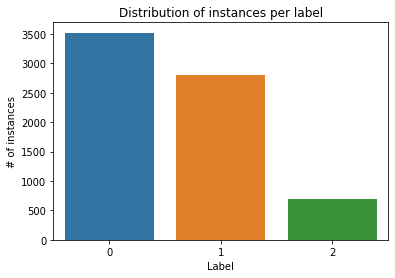

In [7]:
#Class distribution checking
counter = Counter(y)
dist_plot=sns.barplot(x=list(counter.keys()), y=list(counter.values()))
dist_plot.set_title('Distribution of instances per label')
dist_plot.set_xlabel('Label')
dist_plot.set_ylabel('# of instances')

Classes are unbalanced, to improve prediction on the minoritary classes the tool SMOTE is used to equalize the number of instances for each class/label:


In [8]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Text(0, 0.5, '# of instances')

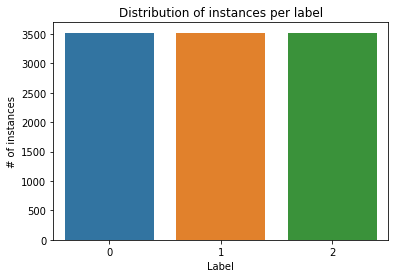

In [9]:
#Balanced Class distribution
dist_plot=sns.barplot(x=y.value_counts().index, y=y.value_counts())
dist_plot.set_title('Distribution of instances per label')
dist_plot.set_xlabel('Label')
dist_plot.set_ylabel('# of instances')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  stratify=y)

In [11]:
# Using Pipeline and GridSearchCV to obtimize the Random Forest Classifier Model
steps = [('scaler', StandardScaler()), ('clf', RandomForestClassifier())]
pipeline = Pipeline(steps) # define the pipeline object.

In [12]:
parameters = {
    'clf__bootstrap': [True],
    'clf__max_depth': [80, 90, 100, 110],
    'clf__max_features': [2, 3],
    'clf__min_samples_leaf': [3, 4, 5],
    'clf__min_samples_split': [8, 10, 12],
    'clf__n_estimators': [50, 100, 300]}

In [13]:
grid = GridSearchCV(pipeline, param_grid=parameters, cv=3, verbose=4)
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=50, score=0.868, total=   0.7s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=50, score=0.883, total=   0.6s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=50, score=0.886, total=   0.8s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.869, total=   1.3s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.878, total=   1.2s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.887, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.862, total=   1.2s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.877, total=   1.3s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.884, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.863, total=   1.0s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.871, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.884, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=2, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.873, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.881, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.894, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.872, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.882, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.895, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.865, total=   1.5s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.876, total=   1.3s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.881, total=   1.5s
[CV] clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=80, clf__max_features=3, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.870, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.877, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.890, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.870, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.873, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.883, total=   1.1s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.862, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.870, total=   1.3s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.881, total=   1.2s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=2, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.874, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.880, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.892, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.872, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.880, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.895, total=   1.7s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.869, total=   1.6s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.877, total=   1.4s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.886, total=   1.6s
[CV] clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=90, clf__max_features=3, clf__min_

[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.868, total=   2.0s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.882, total=   1.7s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.892, total=   1.9s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, cl

[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.866, total=   1.9s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.868, total=   1.7s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.888, total=   1.9s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, cl

[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.866, total=   1.6s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.871, total=   1.8s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.881, total=   1.9s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=2, cl

[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.873, total=   2.3s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.876, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.890, total=   2.1s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, cl

[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.871, total=   2.2s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.881, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.888, total=   2.6s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, cl

[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.865, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.879, total=   2.3s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.886, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=100, clf__max_features=3, cl

[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.873, total=   2.1s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.885, total=   1.8s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.889, total=   2.1s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, cl

[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.869, total=   1.9s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.871, total=   1.8s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.890, total=   2.0s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, cl

[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.866, total=   1.8s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.877, total=   1.3s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.882, total=   2.1s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=2, cl

[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.875, total=   2.2s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.881, total=   2.1s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=100, score=0.893, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=3, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, cl

[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.871, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.877, total=   2.3s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=100, score=0.889, total=   2.4s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=4, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, cl

[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.870, total=   2.2s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.875, total=   2.3s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=100, score=0.886, total=   2.2s
[CV] clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, clf__min_samples_leaf=5, clf__min_samples_split=8, clf__n_estimators=300 
[CV]  clf__bootstrap=True, clf__max_depth=110, clf__max_features=3, cl

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed: 27.4min finished


score = 0.91
{'clf__bootstrap': True, 'clf__max_depth': 100, 'clf__max_features': 3, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 8, 'clf__n_estimators': 300}


In [14]:
print ("score = %3.3f" %(grid.score(X_test,y_test)))
print (grid.best_params_)

score = 0.906
{'clf__bootstrap': True, 'clf__max_depth': 100, 'clf__max_features': 3, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 8, 'clf__n_estimators': 300}


S'arriba a una accuracy del 90,6% amb els valors dels hiperparàmetres detallats anteriorment.

Fonts info:
* Problemes amb els parametres en el gridsearch, es dona solució en: https://stackoverflow.com/questions/64089009/how-can-i-tune-the-parameters-in-a-random-forest-classifier-inside-a-pipeline
* https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27

Del Modle de DS-Sprint 12: 
* https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
* https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
* https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/


**- Exercici 2:**
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules


Prenem el text de la primera noticia que surt a la edició web de la CNN per a Europa del dia que començo aquest exercici, aquesta notícia porta per títol ***Why Europe's fight against the pandemic is about to get much more dangerous***:

    https://edition.cnn.com/2021/12/14/europe/europe-covid-vaccines-opposition-populism-intl/index.html 

In [15]:
text='''Paris (CNN)"Despite months of persuasion, despite intensive media campaigns, despite discussions in various media we have not succeeded in convincing enough people to get vaccinated." Those were the words of former Austrian Chancellor Alexander Schallenberg last month as he announced the first nationwide vaccine mandate in Europe.
Now, Germany looks set to follow where Austria has led.
Others have made vaccines mandatory for parts of the population and imposed restrictions that increasingly explicitly target the unvaccinated, as Europe battles the twin challenges of sharply rising Covid figures and plateauing vaccination rates.
Nearly one year into the EU's vaccination campaign, and with around one in three Europeans still unvaccinated, it is not so much hesitancy that European governments are now facing as outright opposition, with the danger that as governments get tougher so too will popular anger towards them.
The crucial question of trust
Only 19% of Europeans include their government among their most trusted sources of reliable information on Covid-19 vaccines, according to a survey conducted in May 2021 by the European Barometer, a collection of cross-country public opinion surveys conducted regularly on behalf of the EU's institutions.
Even before the pandemic, vaccine hesitancy in Europe was strongly correlated to a populist distrust of mainstream parties and governments.
One study published in the European Journal of Public Health in 2019 found "a highly significant positive association between the percentage of people in a country who voted for populist parties and the percentage who believe that vaccines are not important and not effective."
What the pandemic has provided is a Europe-wide real-time test of that correlation. Nearly two years in and with most countries having exhausted what means they had of encouraging people to get vaccinated, the map of those who remain unvaccinated shows that where there is distrust in government and traditional political parties -- as measured by the strength of populist movements -- many people have yet to get vaccinated.
Essentially, people who trust institutions need no convincing in the face of a pandemic; people who don't are unlikely to be influenced at all.
Bodies pile up outside hospital morgue as Romania struggles with fourth wave of Covid
Bodies pile up outside hospital morgue as Romania struggles with fourth wave of Covid
Eastern Europe is where vaccination rates are the lowest. Bulgaria has the lowest rate of all, with just 26.6% of the total population vaccinated, according to government data. The country has also been going through a major political crisis with three parliamentary elections held this year.
Difficulties with vaccine rollouts and in reaching more remote and elderly rural populations are also to blame in Eastern Europe, but in some of the countries where vaccine take-up has been lowest, populist parties are either in power or strong electorally.
Further west, lower vaccination rates are also to be found in countries and regions with either popular or voluble populist or extremist movements, as in Germany, Austria and Northern Italy.
In a paper published by the journal Psychological Medicine in October, Michele Roccato and Silvia Russo from the University of Turin argue that their study shows "people with a populist orientation tend to refuse the Covid-19 vaccine, in line with previous research showing that vaccine refusal is often politicized, but that its politicization is not limited to the traditional left-right cleavage."
A new common enemy
Sophie Tissier, who organizes protests against Covid-19 restrictions and vaccines in France, says that these protests have created a new political force that is radical but goes beyond party political lines.
She says her group seeks to "create a citizens' opposition which is beyond electoral considerations and much more like a watchdog that sits outside the world of politics to be able to tell it: 'Look here, you are no longer protecting our rights, you are no longer protecting our rights under the law.'"
Demonstrators march during a protest against coronavirus measures in Brussels, Belgium, on December 5, 2021.
Demonstrators march during a protest against coronavirus measures in Brussels, Belgium, on December 5, 2021.
In August, more than 230,000 people took to the streets across the country in one day after France became one of the first European countries to announce the use of relatively strict vaccine passes.
"It really set things alight because people realized that life as it was, was coming to an end," she said. "People would no longer be free, or able to go out as they did."
Since then, protests have tapered off in France, partly because no mainstream party has been openly encouraging its supporters to join them. France's vaccine rates are among the highest in Europe, suggesting that even in countries where there is strong vaccine hesitancy -- as there was in France even before the pandemic -- far-right or populist parties' stance on the vaccine can have an impact.
Elsewhere in Europe, such groups are clearly fanning the anti-vaccination flames. In Austria, several protests planned since the government announced its nationwide vaccine mandate last month have been planned by the far-right Freedom Party.
The mandate is due to come into force in February 2022.
Even as he announced the move, Schallenberg accused the Freedom Party of being responsible for the country's low vaccination rates and of having stirred up vaccine hesitancy.
"We have too many political forces in this country that are fighting against [vaccination] vehemently, massively and publicly. That is irresponsible," Schallenberg said, adding: "Incited by these radical opponents of vaccination, by specious fake news, unfortunately too many of us have not been vaccinated. The consequence is overcrowded intensive care units and enormous human suffering."
The world has the tools to end the coronavirus pandemic. They&#39;re not being used properly
The world has the tools to end the coronavirus pandemic. They're not being used properly
In other European countries, populist parties have also jumped on the bandwagon.
And the divide in opinion over pandemic measures is no longer about extreme left and extreme right, said French political scientist Jean-Yves Camus, but "between the mainstream and the periphery."
"It's much more about the extreme," Camus said. "The most extreme fringe groups taking advantage of the pandemic to say: 'This virus is fake, there is no pandemic and you are being tricked by your governments. It's a worldwide conspiracy of your national governments. They are using the pandemic to infringe on your individual rights and using vaccination passes to have your personal data,' and so on."
In parts of Eastern Europe, but also in and around Germany -- from Northern Italy to the Netherlands and Austria -- parties which once focused on immigration or Europe have been tapping into the widespread anger of those opposed to vaccines and Covid-19 restrictions, shifting their attention to an issue far more likely to appeal to the apolitical and to cut across traditional party political lines.
Their new enemy is far more federating: The Covid-19 measures and vaccination campaigns that they say threaten their freedom.
A protester wearing a mask depicting syringes applauds in Geneva, Switzerland, on October 9, 2021, during a rally against coronavirus measures.
A protester wearing a mask depicting syringes applauds in Geneva, Switzerland, on October 9, 2021, during a rally against coronavirus measures.
Vaccine mandates
The World Health Organization has cautioned against vaccine mandates, because of their potential impact on public confidence and public trust. Dr Hans Kluge, WHO's Europe Director, said they should be used as "an absolute last resort, and only applicable when all other feasible options to improve vaccine uptake have been exhausted."
In a part of the world where the fight against the pandemic has already been hampered by vaccine hesitancy, such mandates could fuel more resistance.
"The worry is that anti-vaxxers could come to hold even more extreme positions," said Russo, of the University of Turin. "That's one risk. But we should also consider that where vaccines become mandatory, there will need to be controls and that could further undermine institutional trust. "
In other words, forced vaccination might push people into vaccination centers but it will also drive some of them to the streets, confirming and further fueling their deeply held suspicion of "the system."
The fight against the pandemic may one day come to an end, but the fight against populism in Europe could be just beginning.'''

In [16]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Paris', '(', 'CNN', ')', "''", 'Despite', 'months', 'of', 'persuasion', ',', 'despite', 'intensive', 'media', 'campaigns', ',', 'despite', 'discussions', 'in', 'various', 'media', 'we', 'have', 'not', 'succeeded', 'in', 'convincing', 'enough', 'people', 'to', 'get', 'vaccinated', '.', "''", 'Those', 'were', 'the', 'words', 'of', 'former', 'Austrian', 'Chancellor', 'Alexander', 'Schallenberg', 'last', 'month', 'as', 'he', 'announced', 'the', 'first', 'nationwide', 'vaccine', 'mandate', 'in', 'Europe', '.', 'Now', ',', 'Germany', 'looks', 'set', 'to', 'follow', 'where', 'Austria', 'has', 'led', '.', 'Others', 'have', 'made', 'vaccines', 'mandatory', 'for', 'parts', 'of', 'the', 'population', 'and', 'imposed', 'restrictions', 'that', 'increasingly', 'explicitly', 'target', 'the', 'unvaccinated', ',', 'as', 'Europe', 'battles', 'the', 'twin', 'challenges', 'of', 'sharply', 'rising', 'Covid', 'figures', 'and', 'plateauing', 'vaccination', 'rates', '.', 'Nearly', 'one', 'year', 'into', 'th

In [17]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 574 samples and 1562 outcomes>


In [18]:
fdist.most_common(30) #frequència de les 30 'paraules' més trobades

[(',', 74),
 ('the', 62),
 ('.', 52),
 ('of', 40),
 ('to', 37),
 ('in', 36),
 ('and', 32),
 ('a', 21),
 ('that', 19),
 ('is', 17),
 ("''", 15),
 ('vaccine', 15),
 ('``', 15),
 ('are', 14),
 ('have', 13),
 ('as', 13),
 ('on', 12),
 ('pandemic', 12),
 ('Europe', 11),
 ('vaccination', 11),
 ('with', 11),
 ('The', 11),
 ('people', 10),
 ('has', 10),
 ('against', 10),
 ('not', 8),
 ("'s", 8),
 ('by', 8),
 ('populist', 8),
 ('been', 8)]

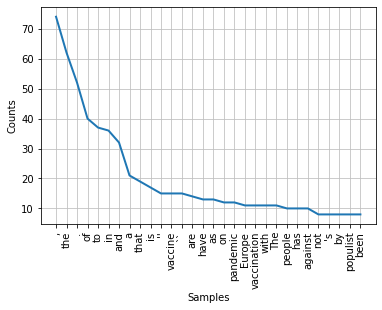

In [19]:
# Frequency Distribution Plot

fdist.plot(30,cumulative=False)
plt.show()

Trobo que les paraules de menys de tres lletres no hi haurien de ser perquè són majoritariament connectors. Provem en eliminar-les.

In [20]:
 len(fdist)

574

In [21]:
delete_list=[]
for i in fdist.keys():
    if len(i)<=3:
        delete_list.append(i)
for i in delete_list:
    del fdist[i]
len(fdist)

475

S'eliminen 99 entrades.

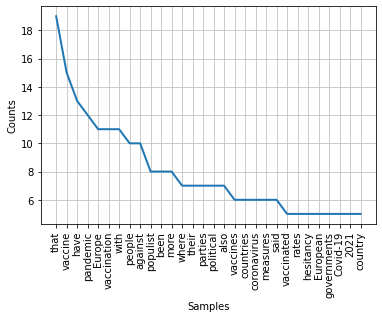

In [22]:
fdist.plot(30,cumulative=False)
plt.show()

Penso que aquesta taula ens aporta més imformació que la previa ren referencia al que s'està parlant, tot i que algo d'informació es pot perdre amb paraules curtes de tres lletres o bé en conjuncions que podrien donar sentiment: no, not, yes, but,...

## Nivell 2

 **- Exercici 3:** Treu les stopwords i realitza stemming al teu conjunt de dades.


In [23]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'does', 'only', 'o', 'over', 'at', 'for', 'once', 'ma', 'y', 'mustn', 'be', 'then', 'he', 'above', 'than', 'just', 'how', 'am', 'now', 'under', 'your', "hadn't", 'it', 'was', 'to', 'hasn', 'have', 'we', 'between', 'or', 'theirs', 'each', 'isn', 'while', 'do', 'where', 'with', 'can', 'the', 'this', 'about', 'further', 'that', 'again', 'during', "that'll", 'those', 'are', 'why', "shan't", "wasn't", 'himself', 'more', 'yourself', 'few', 'wasn', 'our', 'his', 'my', "aren't", 'you', "you're", 'nor', 'into', 'not', 'and', 'has', 'both', "didn't", 'been', "doesn't", 'm', "she's", 'these', "don't", 'couldn', "couldn't", 'is', 'ain', 'after', 'her', 'mightn', 'own', "isn't", 'but', 'as', 'needn', 'she', 'had', "weren't", 'here', 't', 'haven', 'against', 'when', 've', 'were', 'an', "mightn't", 'ours', 'yours', 'their', 'herself', 'no', 're', 'what', 'all', 'such', 'ourselves', 'most', 'down', 'on', 'yourselves', "you'll", 'its', 'themselves', 'other', "haven't", 'through', 's', 'will', 'having'

In [24]:
filtered_words=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_words.append(w)
print("Tokenized Word:",filtered_words)

Tokenized Word: ['Paris', '(', 'CNN', ')', "''", 'Despite', 'months', 'persuasion', ',', 'despite', 'intensive', 'media', 'campaigns', ',', 'despite', 'discussions', 'various', 'media', 'succeeded', 'convincing', 'enough', 'people', 'get', 'vaccinated', '.', "''", 'Those', 'words', 'former', 'Austrian', 'Chancellor', 'Alexander', 'Schallenberg', 'last', 'month', 'announced', 'first', 'nationwide', 'vaccine', 'mandate', 'Europe', '.', 'Now', ',', 'Germany', 'looks', 'set', 'follow', 'Austria', 'led', '.', 'Others', 'made', 'vaccines', 'mandatory', 'parts', 'population', 'imposed', 'restrictions', 'increasingly', 'explicitly', 'target', 'unvaccinated', ',', 'Europe', 'battles', 'twin', 'challenges', 'sharply', 'rising', 'Covid', 'figures', 'plateauing', 'vaccination', 'rates', '.', 'Nearly', 'one', 'year', 'EU', "'s", 'vaccination', 'campaign', ',', 'around', 'one', 'three', 'Europeans', 'still', 'unvaccinated', ',', 'much', 'hesitancy', 'European', 'governments', 'facing', 'outright', '

In [25]:
print(f'La llista inicial tenia {len(tokenized_word)} elements i sense stop words en té {len(filtered_words)}.')

La llista inicial tenia 1562 elements i sense stop words en té 1005.


In [26]:
# Stemming
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_words)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Paris', '(', 'CNN', ')', "''", 'Despite', 'months', 'persuasion', ',', 'despite', 'intensive', 'media', 'campaigns', ',', 'despite', 'discussions', 'various', 'media', 'succeeded', 'convincing', 'enough', 'people', 'get', 'vaccinated', '.', "''", 'Those', 'words', 'former', 'Austrian', 'Chancellor', 'Alexander', 'Schallenberg', 'last', 'month', 'announced', 'first', 'nationwide', 'vaccine', 'mandate', 'Europe', '.', 'Now', ',', 'Germany', 'looks', 'set', 'follow', 'Austria', 'led', '.', 'Others', 'made', 'vaccines', 'mandatory', 'parts', 'population', 'imposed', 'restrictions', 'increasingly', 'explicitly', 'target', 'unvaccinated', ',', 'Europe', 'battles', 'twin', 'challenges', 'sharply', 'rising', 'Covid', 'figures', 'plateauing', 'vaccination', 'rates', '.', 'Nearly', 'one', 'year', 'EU', "'s", 'vaccination', 'campaign', ',', 'around', 'one', 'three', 'Europeans', 'still', 'unvaccinated', ',', 'much', 'hesitancy', 'European', 'governments', 'facing', 'outright'

In [27]:
print(f'Al fer Stemming a la llista sense stop words es passa de {len(filtered_words)} a {len(stemmed_words)} entrades.')

Al fer Stemming a la llista sense stop words es passa de 1005 a 1005 entrades.


No es borra cap entrada, si no que es transforma per la seva arrel. Es pot veure en les gràfiques de distribució:

In [28]:
fdist_stemming = FreqDist(stemmed_words)
fdist_filtered =FreqDist(filtered_words)

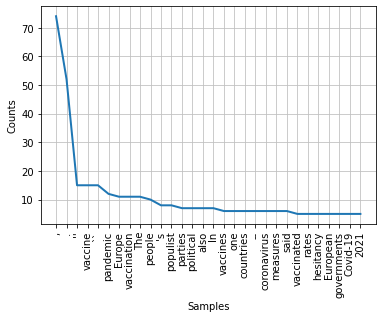

In [29]:
fdist_filtered.plot(30,cumulative=False)
plt.show()

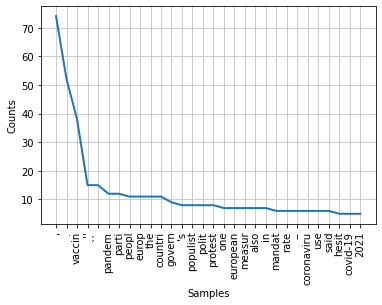

In [30]:
fdist_stemming.plot(30,cumulative=False)
plt.show()

A la gràfica ja es pot veure les paraules amb la mateixa arrel (vaccine, vaccination, vaccines, vaccined) es transformen en la paraula arrel (vaccin) incrementant sensiblement la seva freqüència.

## Nivell 3

 **- Exercici 4:** Realitza sentiment analysis al teu conjunt de dades.

Fem el sentiment anàlisis amb la llibreria VADEr (Valence Aware Dictionary and sEntiment Reasoner) de NLTK que és un  Pre-Trained Sentiment Analyzer:

In [31]:
sia = SentimentIntensityAnalyzer()

In [32]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(text=text)

{'neg': 0.097, 'neu': 0.794, 'pos': 0.108, 'compound': 0.9751}

Al ser un article d'un medi de comunicació global es manté en un to neutre majoritariament. No hi ha opinions radicals ni punts de vista catastrofistres. L'article dóna la informació de forma objectiva i no transmet un sentiment ni clarament negatiu ni positiu, hauria de ser així per a la premsa que es considera objectiva.

Font del Sprint 12: 
* https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

Altres webs consultades:
* https://realpython.com/sentiment-analysis-python/
* https://realpython.com/python-nltk-sentiment-analysis/